In [1]:
import netCDF4 as nc4
import keras
from sklearn.model_selection import train_test_split
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Input, add
from keras.layers.core import  Dense, Dropout, Activation, Flatten, Reshape
from keras import regularizers
from keras.regularizers import l2
from keras.layers.convolutional import Conv2D, MaxPooling2D, UpSampling2D, ZeroPadding2D
from keras.utils import np_utils


In [2]:
file_path =['C:/Users/Administrator/OneDrive - The University of Melbourne/capstone/data/OFAM_2017/ocean_eta_t/ocean_eta_t_2000_01.nc']
file_path.append('C:/Users/Administrator/OneDrive - The University of Melbourne/capstone/data/OFAM_2017/ocean_eta_t/ocean_eta_t_2000_02.nc')
file_path.append('C:/Users/Administrator/OneDrive - The University of Melbourne/capstone/data/OFAM_2017/ocean_eta_t/ocean_eta_t_2000_03.nc')
file_path.append('C:/Users/Administrator/OneDrive - The University of Melbourne/capstone/data/OFAM_2017/ocean_eta_t/ocean_eta_t_2000_04.nc')
# file_path.append('C:/Users/Administrator/OneDrive - The University of Melbourne/capstone/data/OFAM_2017/ocean_eta_t/ocean_eta_t_2000_05.nc')
# file_path.append('C:/Users/Administrator/OneDrive - The University of Melbourne/capstone/data/OFAM_2017/ocean_eta_t/ocean_eta_t_2000_06.nc')

In [4]:
file_path

['C:/Users/Administrator/OneDrive - The University of Melbourne/capstone/data/OFAM_2017/ocean_eta_t/ocean_eta_t_2000_01.nc',
 'C:/Users/Administrator/OneDrive - The University of Melbourne/capstone/data/OFAM_2017/ocean_eta_t/ocean_eta_t_2000_02.nc',
 'C:/Users/Administrator/OneDrive - The University of Melbourne/capstone/data/OFAM_2017/ocean_eta_t/ocean_eta_t_2000_03.nc',
 'C:/Users/Administrator/OneDrive - The University of Melbourne/capstone/data/OFAM_2017/ocean_eta_t/ocean_eta_t_2000_04.nc']

In [3]:
ds = nc4.MFDataset(file_path)
eta_t_arr = ds.variables['eta_t'][:]

In [4]:
eta_t_arr.shape

(121, 1500, 3600)

In [5]:
time_ytocean_arr = eta_t_arr[:,1,:]
time_ytocean_arr.shape

(121, 3600)

In [6]:
# split into train & test
time_ytocean_train, time_ytocean_test = train_test_split(time_ytocean_arr, test_size=0.33)
time_ytocean_train.shape

(81, 3600)

In [7]:
input_size = 3600
hidden_size = 360
output_size = 3600

In [16]:
# fit a single layer autoencoder
x = Input(shape=(input_size,))
h = Dense(hidden_size, activation='relu')(x)
r = Dense(output_size, activation='sigmoid')(h)

autoencoder = Model(inputs=x, outputs=r)
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 3600)]            0         
_________________________________________________________________
dense_6 (Dense)              (None, 360)               1296360   
_________________________________________________________________
dense_7 (Dense)              (None, 3600)              1299600   
Total params: 2,595,960
Trainable params: 2,595,960
Non-trainable params: 0
_________________________________________________________________


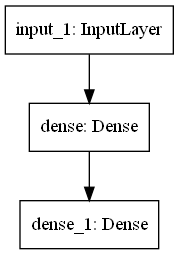

In [12]:
keras.utils.plot_model(autoencoder, "time_ytocean_autoencoder.png")

In [17]:
epochs = 200
batch_size = 3600

history = autoencoder.fit(time_ytocean_train, time_ytocean_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(time_ytocean_test, time_ytocean_test))

000
Epoch 28/200
1/1 [==============================] - 0s 75ms/step - loss: 785033664.0000 - val_loss: 785033600.0000
Epoch 29/200
1/1 [==============================] - 0s 70ms/step - loss: 785033664.0000 - val_loss: 785033600.0000
Epoch 30/200
1/1 [==============================] - 0s 79ms/step - loss: 785033664.0000 - val_loss: 785033600.0000
Epoch 31/200
1/1 [==============================] - 0s 77ms/step - loss: 785033728.0000 - val_loss: 785033600.0000
Epoch 32/200
1/1 [==============================] - 0s 77ms/step - loss: 785033728.0000 - val_loss: 785033600.0000
Epoch 33/200
1/1 [==============================] - 0s 78ms/step - loss: 785033728.0000 - val_loss: 785033600.0000
Epoch 34/200
1/1 [==============================] - 0s 73ms/step - loss: 785033728.0000 - val_loss: 785033728.0000
Epoch 35/200
1/1 [==============================] - 0s 72ms/step - loss: 785033728.0000 - val_loss: 785033728.0000
Epoch 36/200
1/1 [==============================] - 0s 73ms/step - loss: 785

dict_keys(['loss', 'val_loss'])


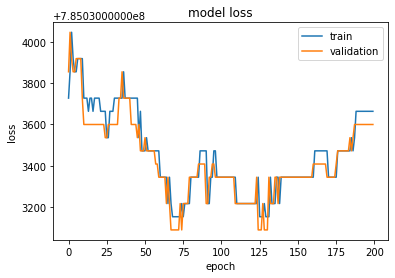

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.keras
print(history.history.keys())

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

# Adding more layers

In [20]:
input_size = 3600
hidden_size = 360
output_size = 3600

x = Input(shape=(input_size,))
hidden_1 = Dense(hidden_size, activation='relu')(x)
h = Dense(output_size, activation='relu')(hidden_1)
hidden_2 = Dense(hidden_size, activation='relu')(h)
r = Dense(output_size, activation='sigmoid')(hidden_2)

autoencoder_m = Model(inputs=x, outputs=r)
autoencoder_m.compile(optimizer='adam', loss='mse')

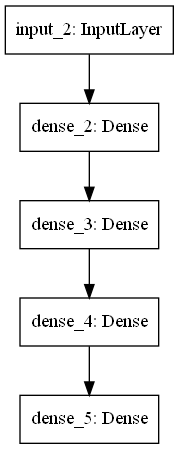

In [12]:
keras.utils.plot_model(autoencoder_m, "time_ytocean_multilayer_autoencoder.png")

In [21]:
epochs = 200
batch_size = 3600

history_m = autoencoder_m.fit(time_ytocean_train, time_ytocean_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(time_ytocean_test, time_ytocean_test))

.0000 - val_loss: 785033472.0000
Epoch 29/200
1/1 [==============================] - 0s 97ms/step - loss: 785033472.0000 - val_loss: 785033408.0000
Epoch 30/200
1/1 [==============================] - 0s 95ms/step - loss: 785033472.0000 - val_loss: 785033408.0000
Epoch 31/200
1/1 [==============================] - 0s 98ms/step - loss: 785033472.0000 - val_loss: 785033408.0000
Epoch 32/200
1/1 [==============================] - 0s 100ms/step - loss: 785033472.0000 - val_loss: 785033408.0000
Epoch 33/200
1/1 [==============================] - 0s 99ms/step - loss: 785033472.0000 - val_loss: 785033408.0000
Epoch 34/200
1/1 [==============================] - 0s 99ms/step - loss: 785033472.0000 - val_loss: 785033472.0000
Epoch 35/200
1/1 [==============================] - 0s 104ms/step - loss: 785033472.0000 - val_loss: 785033472.0000
Epoch 36/200
1/1 [==============================] - 0s 96ms/step - loss: 785033472.0000 - val_loss: 785033472.0000
Epoch 37/200
1/1 [===========================

dict_keys(['loss', 'val_loss'])


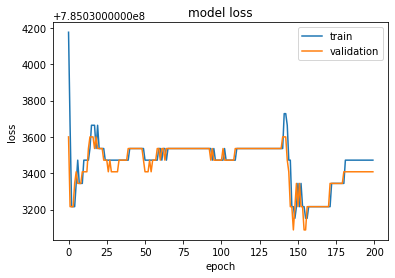

In [22]:
print(history.history.keys())

plt.plot(history_m.history['loss'])
plt.plot(history_m.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()